In [2]:
!cd src/

c:\Users\edison.yi\Documents\code\deferrence_paper\src


c:\Users\edison.yi\Documents\code\deferrence_paper\.venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from utils import name_generator
import scipy.stats as stats
import pymc as pm
import arviz as az
import corner
from typing import List
from plotting import plot_all_individual_judgements
from ideal_credences import Ideal_Credences
from experts import Expert_Group
from agent import Bayesian_Agent

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
# use beta distribution?

In [34]:
#expert judgement = ideal credence + bias + noise

In [35]:
# is chi squared cursed as a likelihood function?

In [36]:
# use less confusing names. be more verbose

In [38]:
'''
do i need this?
An accuracy measure A is a function which takes a
credence function c at a world w, and yields as its output a number A(c, w) which
is a measure of the accuracy of the credence function at that world
'''

'\ndo i need this?\nAn accuracy measure A is a function which takes a\ncredence function c at a world w, and yields as its output a number A(c, w) which\nis a measure of the accuracy of the credence function at that world\n'

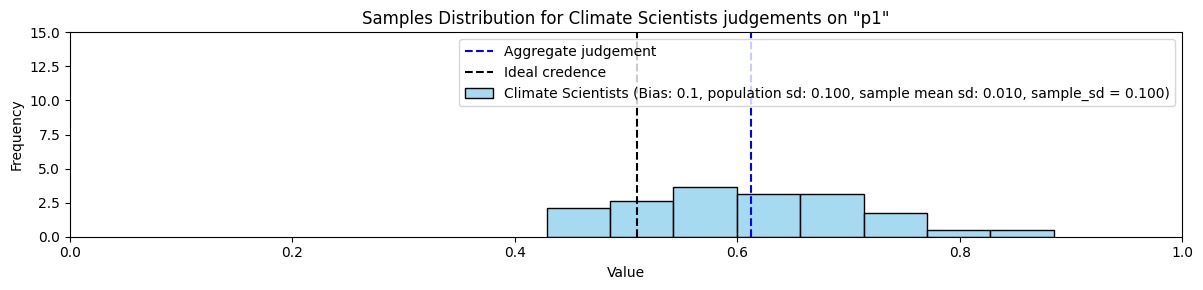

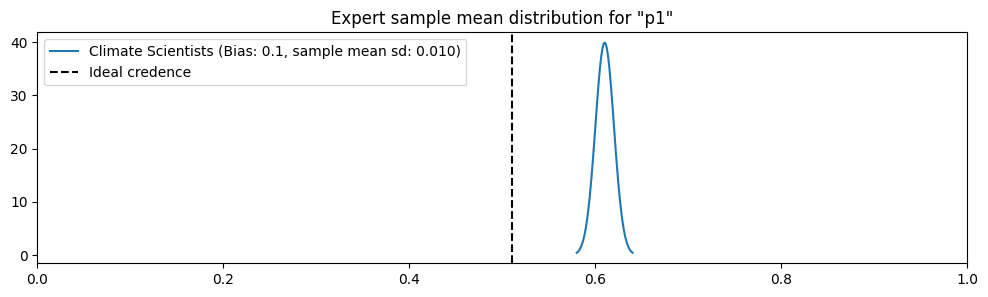

In [39]:
PLOT = True

propositions = ['p1', 
                # 'p2',
                # 'p3'
                ]
# ideal credence should be unique in each world, w. 
ideal_credence_obj = Ideal_Credences(propositions, seed=122)
ideal_credence_obj.random_generate_ideal_credences()
climate_scientists = Expert_Group(ideal_credence_obj,name = 'Climate Scientists',population_bias=0.1,population_sd=0.1,n_experts=100, plot = PLOT)
# climate_skeptics = Expert_Group(ideal_credence_obj,name = 'Climate Skeptics',population_bias=-0.2,population_sd=0.3,n_experts=50, plot = PLOT)

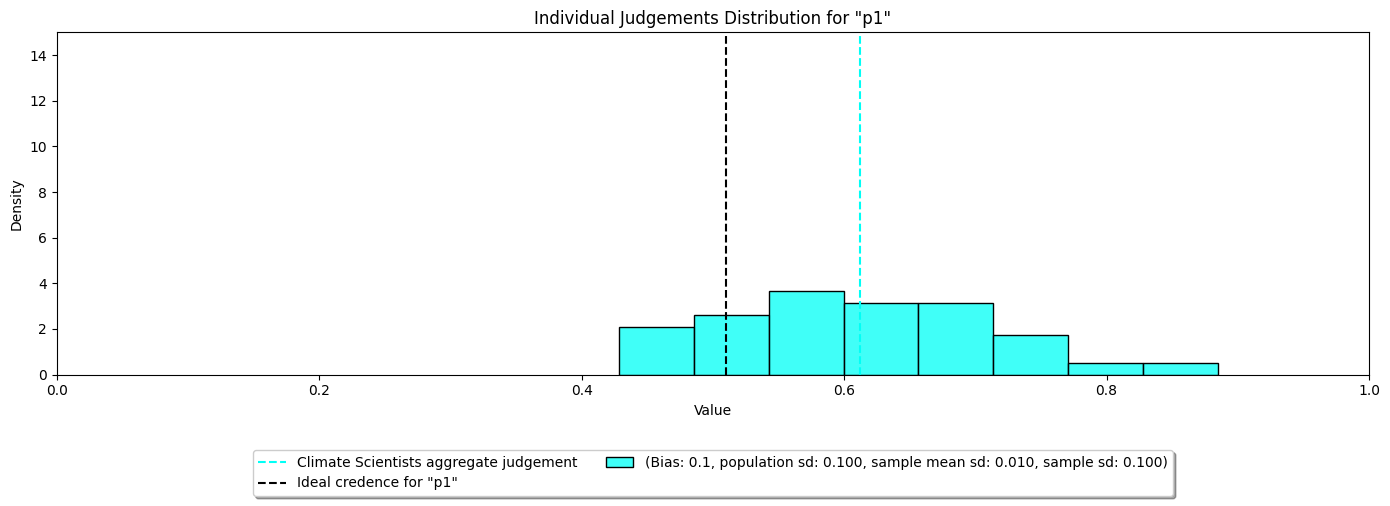

In [40]:
expert_groups = [climate_scientists
                #  ,climate_skeptics
                 ]
plot_all_individual_judgements(expert_groups)

## Example: Sceptical but Open Agent
### Here we can see that the agent's priors move closer to the experts', but does not fully defer. 
### At the same time, the agent's estimate for the expert's bias is increased. 

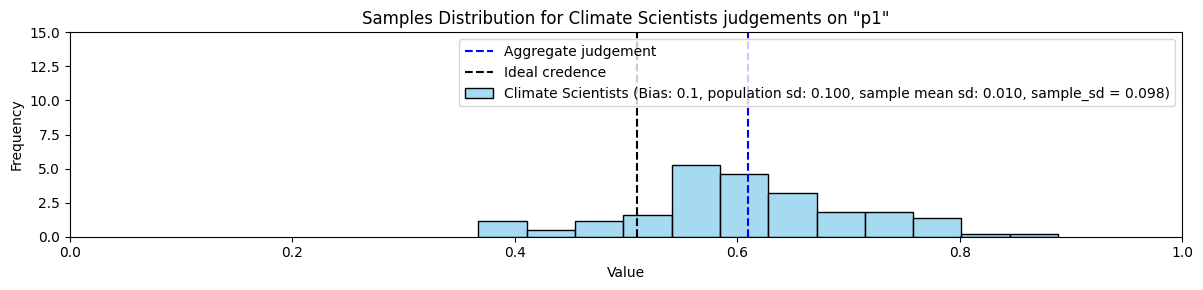

Generating model for proposition:  p1


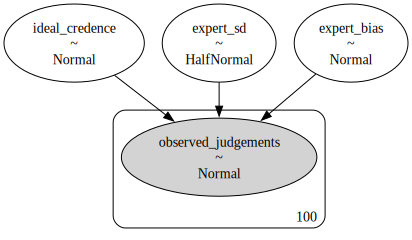

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ideal_credence, expert_bias, expert_sd]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 730 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


[Inference data with groups:
 	> posterior
 	> sample_stats
 	> observed_data]

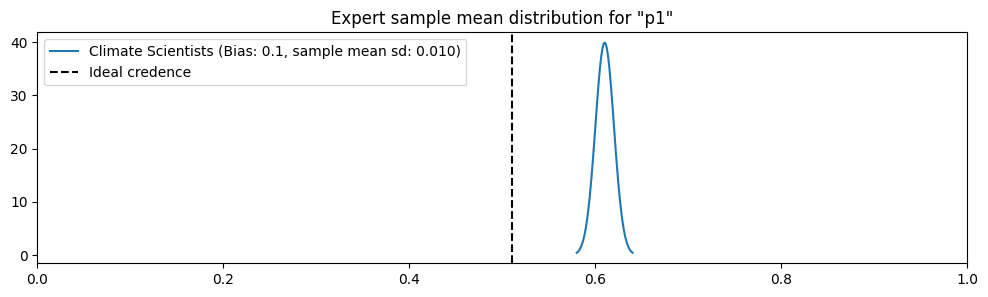

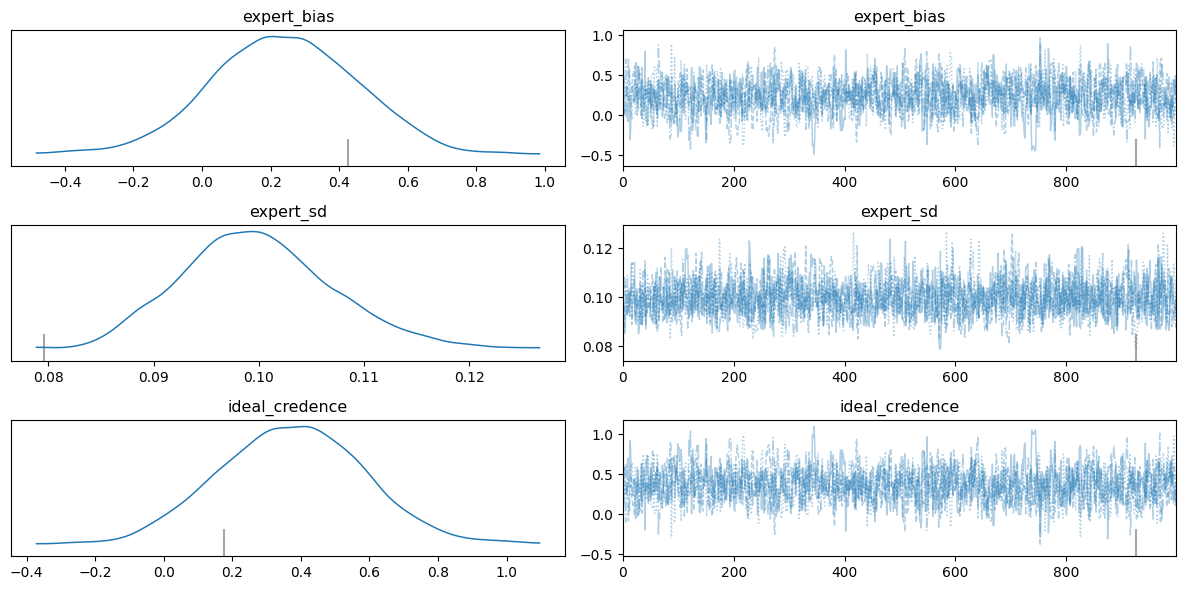

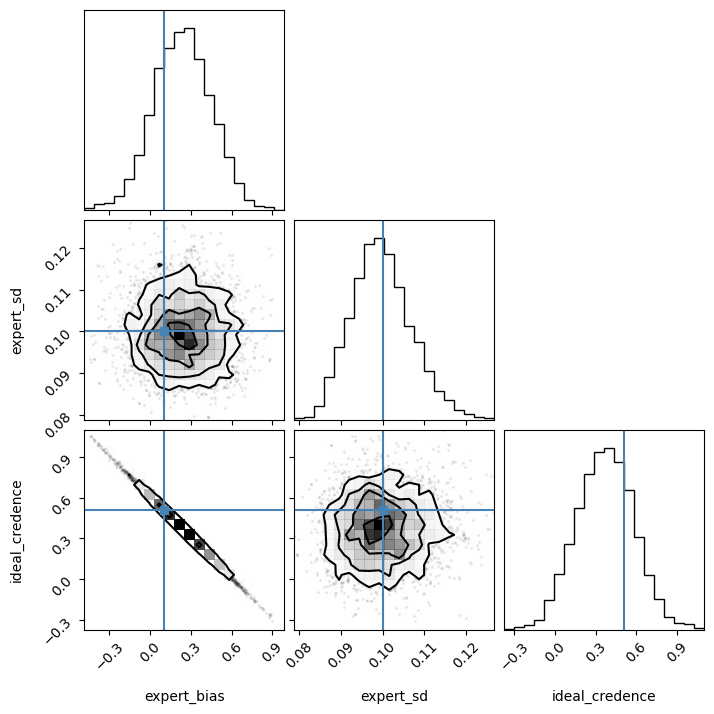

In [23]:

PLOT = True

propositions = ['p1', 
                ]
# ideal credence should be unique in each world, w. 
ideal_credence_obj = Ideal_Credences(propositions, seed=122)
ideal_credence_obj.random_generate_ideal_credences()
climate_scientists = Expert_Group(ideal_credence_obj,name = 'Climate Scientists',population_bias=0.1,population_sd=0.1,n_experts=100, plot = PLOT)

agent_1 = Bayesian_Agent(ideal_credence_obj)
agent_1.get_expert_model(climate_scientists, prior_distribution='normal', credence_prior_mu = 0.1, credence_prior_sigma = 0.3, bias_prior_mu = 0.0, bias_prior_sigma = 0.3, expert_sd_prior_sigma = 0.1)
agent_1.mcmc_get_posteriors(climate_scientists)

# Example: agent with bad priors

Generating model for proposition:  p1


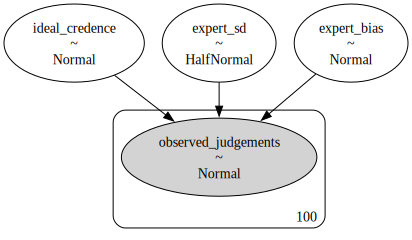

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ideal_credence, expert_bias, expert_sd]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 249 seconds.


[Inference data with groups:
 	> posterior
 	> sample_stats
 	> observed_data]

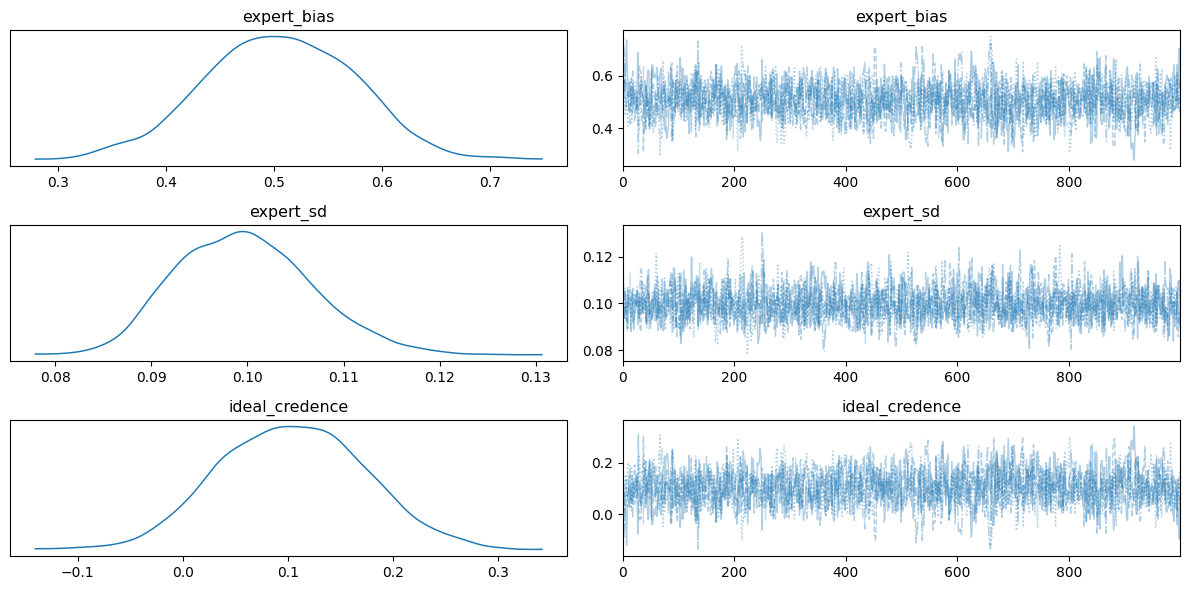

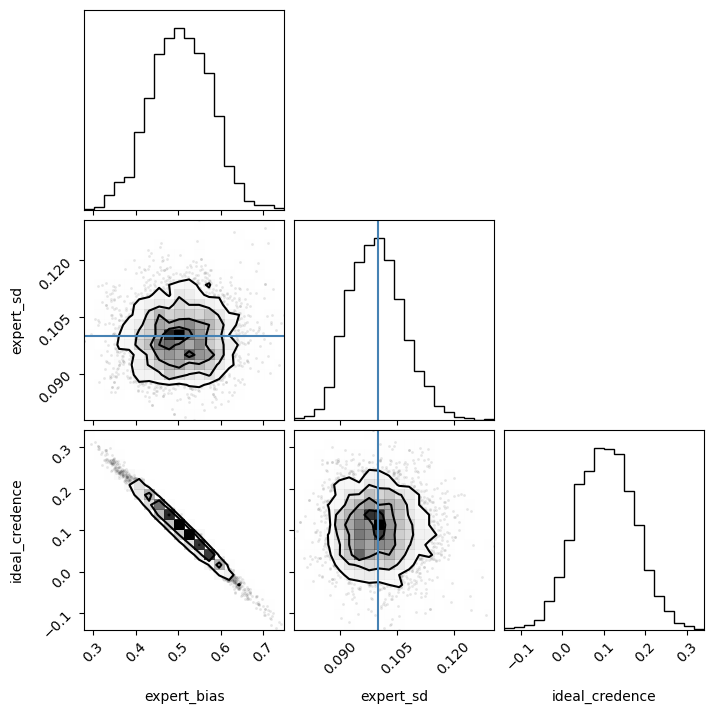

In [24]:
agent_2 = Bayesian_Agent(ideal_credence_obj)
agent_2.get_expert_model(climate_scientists, prior_distribution='normal', credence_prior_mu = 0.1, credence_prior_sigma = 0.1, bias_prior_mu = 0.5, bias_prior_sigma = 0.1, expert_sd_prior_sigma = 0.1)
agent_2.mcmc_get_posteriors(climate_scientists)

# Example: agent with good priors

Generating model for proposition:  p1


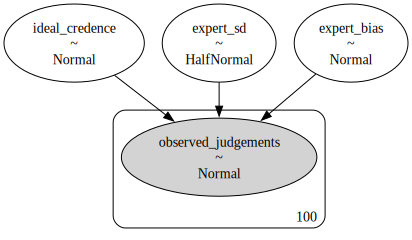

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ideal_credence, expert_bias, expert_sd]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 320 seconds.


[Inference data with groups:
 	> posterior
 	> sample_stats
 	> observed_data]

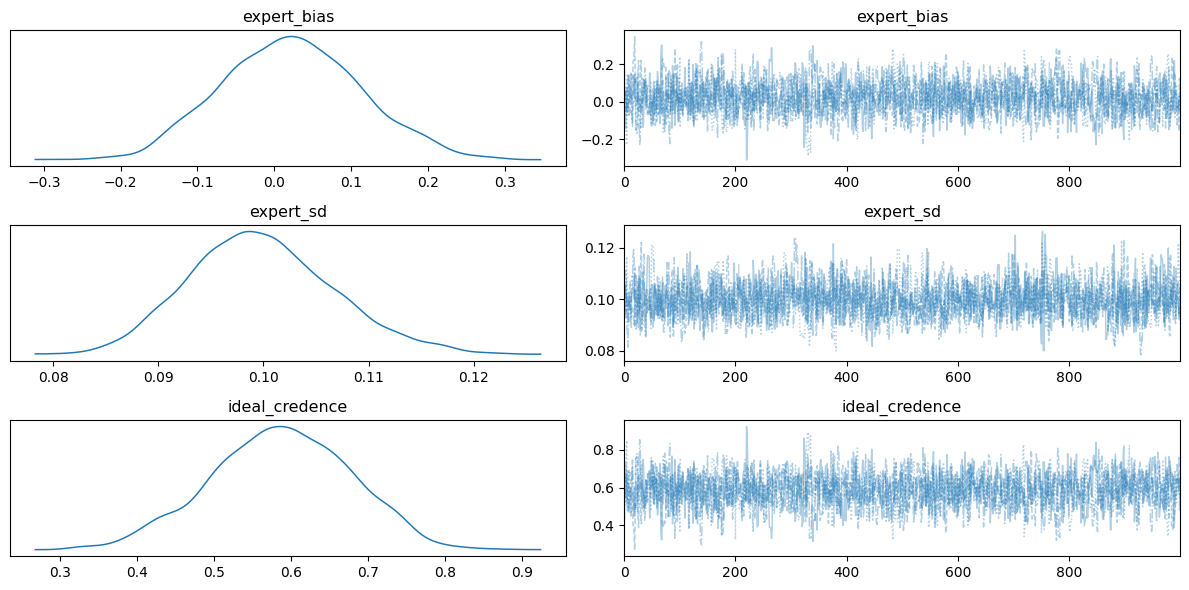

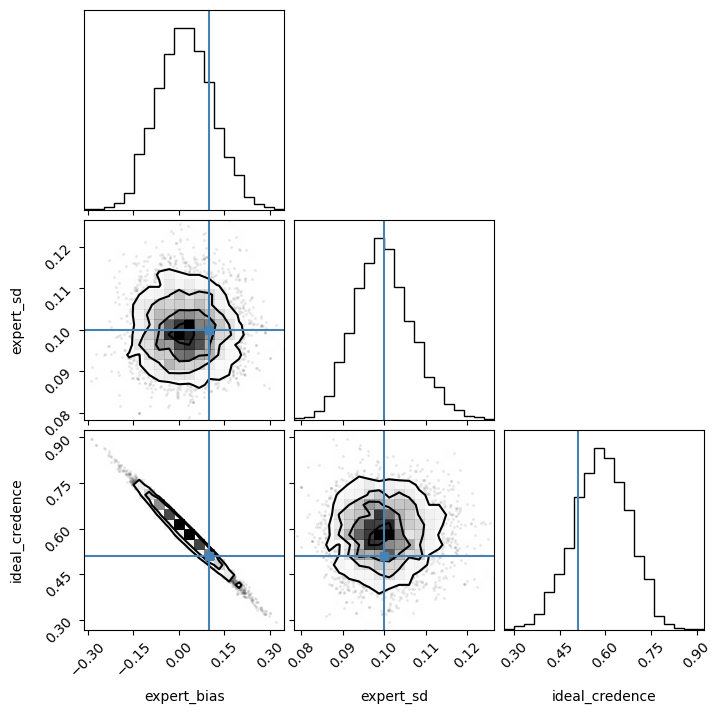

In [26]:
agent_2 = Bayesian_Agent(ideal_credence_obj)
agent_2.get_expert_model(climate_scientists, prior_distribution='normal', credence_prior_mu = 0.5, credence_prior_sigma = 0.2, bias_prior_mu = 0.0, bias_prior_sigma = 0.1, expert_sd_prior_sigma = 0.1)
agent_2.mcmc_get_posteriors(climate_scientists)

# Example: Totally Neutral Agent

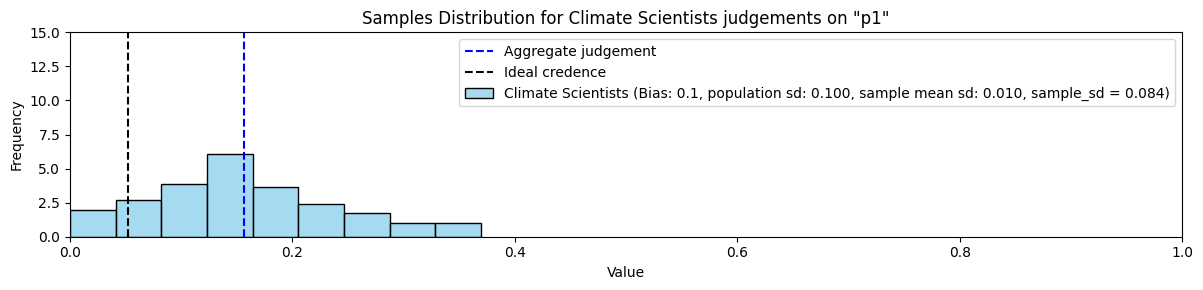

Generating model for proposition:  p1


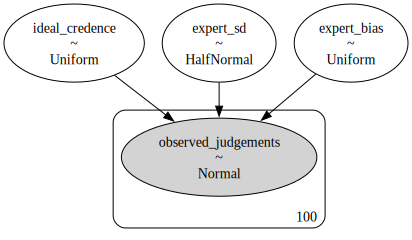

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ideal_credence, expert_bias, expert_sd]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1153 seconds.
There were 105 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


[Inference data with groups:
 	> posterior
 	> sample_stats
 	> observed_data]

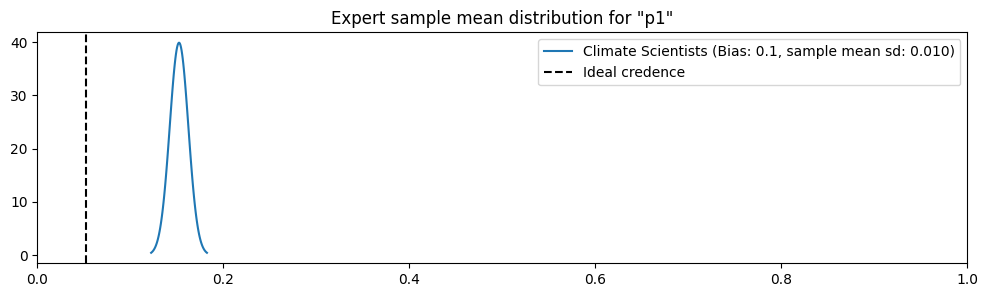

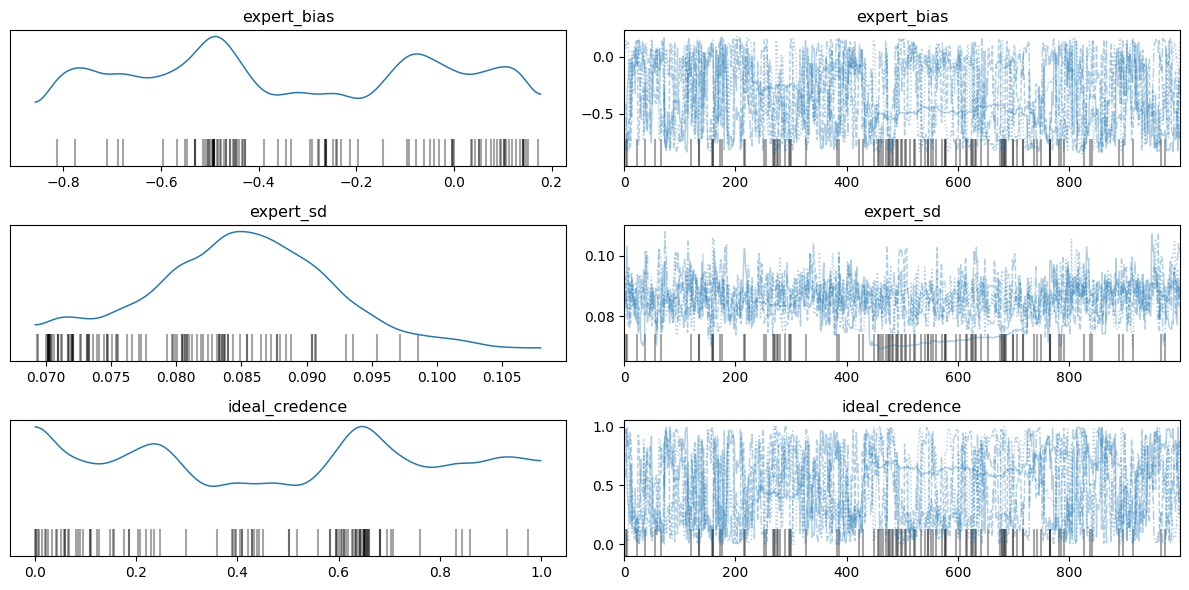

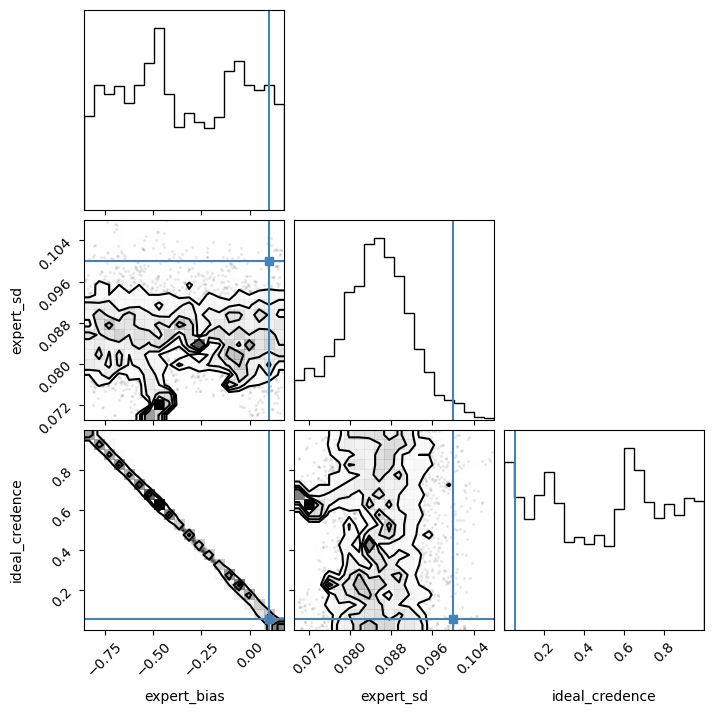

In [45]:

PLOT = True

propositions = ['p1', 
                ]
# ideal credence should be unique in each world, w. 
ideal_credence_obj = Ideal_Credences(propositions, seed=123)
ideal_credence_obj.random_generate_ideal_credences()
climate_scientists = Expert_Group(ideal_credence_obj,name = 'Climate Scientists',population_bias=0.1,population_sd=0.1,n_experts=100, plot = PLOT)

agent_3 = Bayesian_Agent(ideal_credence_obj)
agent_3.get_expert_model(climate_scientists, prior_distribution='uniform')
agent_3.mcmc_get_posteriors(climate_scientists)